# When should we use NumPy to aggregate numerical lists?

In [38]:
import timeit
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns # if you don't have seaborn just uncomment this and the next line
sns.set(style='white', context='talk') 

This code measures how much time it takes to average a list of `n` elements for different `n` values in vanilla Python (`sum(x) / len(x)`) and with NumPy (`x.mean()`).

In [21]:
def measure(stmt, sizes):
    return [timeit.Timer(
        stmt, 
        'import numpy as np; x = np.random.random({:d})'.format(int(size))
    ).timeit(number=1000) for size in sizes]

In [23]:
sizes = np.logspace(1, 6, 6)
vanila = measure('sum(x) / len(x)', sizes)
numpy =  measure('x.mean()', sizes)

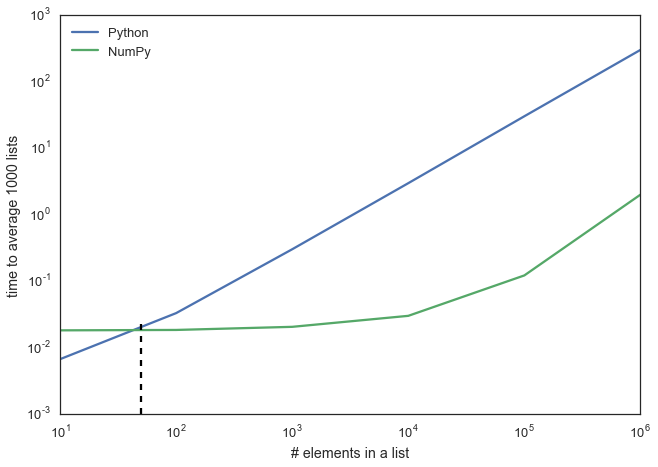

In [47]:
plt.plot(sizes, vanila, label='Python')
plt.plot(sizes, numpy, label='NumPy')
plt.axvline(50, ymax=0.23, color='k', ls='--')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc=2)
plt.xlabel('# elements in a list')
plt.ylabel('time to average 1000 lists');

We can see that for small lists of size < 50 vanilla Python is faster, but for bigger lists NumPy is faster.